In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import linier regression model
from sklearn.linear_model import LinearRegression

In [2]:
import os.path

if os.path.isfile('weight-height.csv'):
    print ("Dataset tersedia")
else:
    print ("Dataset tidak tersedia, download dulu")
    !wget -O weight-height.csv https://raw.githubusercontent.com/galangfs/random-file/main/dataset/Technical/weight-height.csv

Dataset tersedia


In [3]:
# load dataset
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9055 non-null   object 
 1   Height  9055 non-null   float64
 2   Weight  9055 non-null   float64
dtypes: float64(2), object(1)
memory usage: 212.4+ KB


<AxesSubplot:xlabel='Weight', ylabel='Height'>

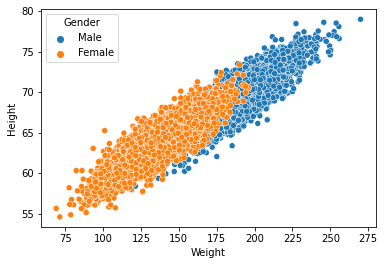

In [5]:
# persebaran Height dan Weight berdasarkan genre dengan seaborn
sns.scatterplot(x='Weight', y='Height', hue='Gender', data=df)


C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


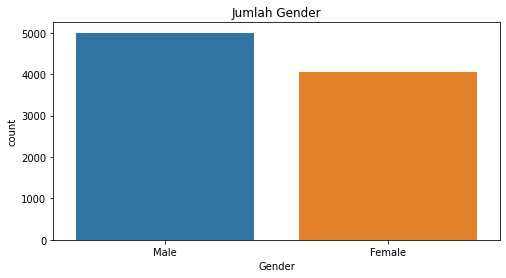

In [6]:
# menampillkan grafik
plt.figure(figsize=(8,4))
plt.title("Jumlah Gender")
sns.countplot(df['Gender'])
plt.show()

In [7]:
# mengubah data kategorikal pada kolom 'Gender' menjadi data numerik
df1 = df.copy()
enc_dict = {'Male':0,
            'Female':1}
# Create the mapped values in a new column
df1['Gender'] = df1['Gender'].map(enc_dict)
# Review dataset
df1


,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9050,1,61.019528,114.387793
9051,1,59.860123,121.862907
9052,1,63.741101,131.687999
9053,1,66.596077,151.149081


In [8]:
y = df1['Weight']
X = df1.drop('Weight', axis=1)

In [9]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9050    114.387793
9051    121.862907
9052    131.687999
9053    151.149081
9054    128.183805
Name: Weight, Length: 9055, dtype: float64

In [10]:
X

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796
...,...,...
9050,1,61.019528
9051,1,59.860123
9052,1,63.741101
9053,1,66.596077


In [11]:
# Train test split
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7244, 2) (7244,)
Test set: (1811, 2) (1811,)


In [12]:
# build linier regression model
# create model
model = LinearRegression()
model_train = model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred= model_train.predict(X_test)


In [13]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:\n", list(zip(X, model.coef_)))


Intercept:  -224.86730075641808
Coefficients:
 [('Gender', -19.57894523611015), ('Height', 5.968314935929235)]


In [14]:
#Predicted values
print("Prediction for test set: {}".format(y_pred))
#Actual value and the predicted value
diff = pd.DataFrame({'Actual weight': y_test, 'Predicted weight': y_pred})
diff

Prediction for test set: [196.7558161  150.82410309 126.87200825 ... 174.55284641 149.55107105
 204.71945255]


,Actual weight,Predicted weight
4677,180.668874,196.755816
7604,141.604855,150.824103
8548,132.555193,126.872008
6719,135.926725,149.077731
2081,169.250231,180.314692
...,...,...
1737,205.676442,205.180867
409,139.905070,144.723868
930,173.634257,174.552846
8487,161.107168,149.551071


In [19]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy = metrics.r2_score(y_test, y_pred)
print(accuracy)
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

0.8980179104529991
R squared: 90.31
Mean Absolute Error: 8.145594332950667
Mean Square Error: 104.2124440281255
Root Mean Square Error: 10.208449638810269


In [16]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'mlr_weight.pkl')
 
# Load the model from the file
mlr_from_joblib = joblib.load('mlr_weight.pkl')
 
# Use the loaded model to make predictions
mlr_from_joblib.predict(X_test)

array([196.7558161 , 150.82410309, 126.87200825, ..., 174.55284641,
       149.55107105, 204.71945255])

In [24]:
X_test

,Gender,Height
4677,0,70.643577
7604,1,66.228132
8548,1,62.214923
6719,1,65.935525
2081,0,67.888843
...,...,...
1737,0,72.055207
409,0,61.925547
930,0,66.923437
8487,1,66.014834


In [25]:

# initialize list of lists
data = [[1, 80]]
 
# Create the pandas DataFrame
df0 = pd.DataFrame(data, columns = ['Gender', 'Height'])
 
# print dataframe.
df0.shape

(1, 2)

In [26]:
import joblib
# Load the model from the file
mlr_from_joblib = joblib.load('mlr_weight.pkl')

# Use the loaded model to make predictions
mlr_from_joblib.predict(df0)

array([233.01894888])

In [ ]:
import numpy as np
import sys
import os
modules = dir()
print(modules)

['In', 'LinearRegression', 'OrdinalEncoder', 'Out', 'StandardScaler', 'X', 'X_test', 'X_train', 'Y', '_', '_10', '_11', '_14', '_23', '_24', '_25', '_26', '_29', '_30', '_32', '_43', '_5', '_52', '_53', '_55', '_61', '_62', '_63', '_64', '_69', '_7', '_71', '_73', '_75', '_76', '_80', '_83', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_i57', '_i58', '_i59', '_i6', '_i60', '_i61', '_i62', '_i63', '_i64', '_i65', '_i66', '_i67', '_i68', '_i69', '_i7', '_i70', '_i71', '_i72